<a href="https://colab.research.google.com/github/smoreira/devfestcerrado19/blob/master/DevFestCerrado19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando TensorFlow e bibliotecas necessárias**

In [1]:
!pip install tensorflow --upgrade

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)
2.0.0


## **Importando a Base FashionMNIST**

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## **Nomeando as classes**

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## **Checando os dados**

In [4]:

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
train_images.shape

(60000, 28, 28)

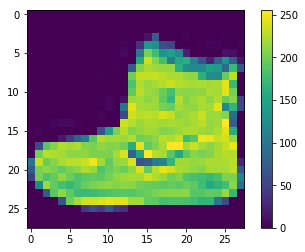

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

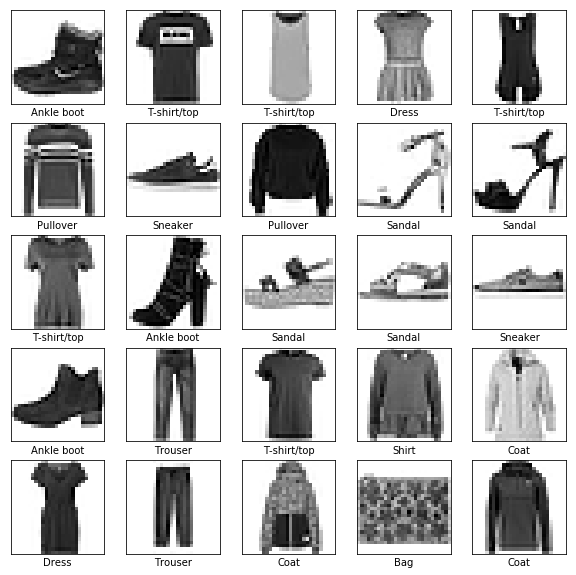

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **Construindo o Modelo**

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## **Compilando o Modelo**

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **Treinando o Modelo**

In [13]:
history = model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4954 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3715 - accuracy: 0.8667
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3362 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3104 - accuracy: 0.8857
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2946 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2801 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2669 - accuracy: 0.9015
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2569 - accuracy: 0.9038
Epoch 9/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2453 - accuracy: 0.9085
Epoch 10/10
6

## **Avaliando a precisão do modelo**

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2215 - accuracy: 0.8822

Test accuracy: 0.8822


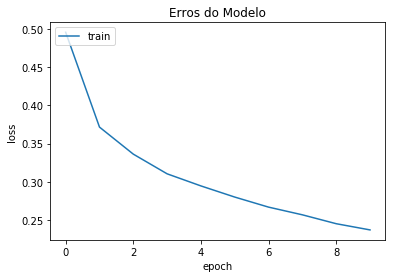

In [15]:
plt.plot(history.history['loss'])
plt.title('Erros do Modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

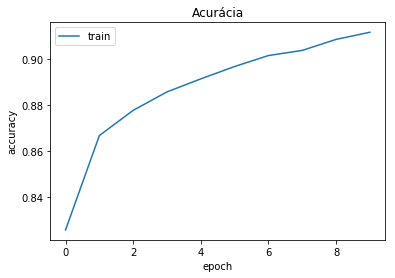

In [16]:
plt.plot(history.history['accuracy'])
plt.title('Acurácia')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Fazendo Predições**

In [0]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([1.3641910e-06, 5.7002049e-11, 3.0344525e-09, 5.7730983e-11,
       8.7573140e-09, 5.2163792e-03, 1.6401350e-07, 9.1897883e-03,
       5.5958395e-08, 9.8559237e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

## **Gravando Modelo**

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.save("modeloDevFest.h5") 

In [0]:
from google.colab import files
files.download("modeloDevFest.h5")